In [1]:
from ripser import ripser
from persim import plot_diagrams
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [2]:
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def graph(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    points = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i])
        if color == 1:
            points.append((X[i],Y[i])) 
        
    x_points = []
    y_points = []
    for i in points: 
        x_points.append(i[0])
        y_points.append(i[1])
        
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()
    
def view_window(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)

    points = []
    for pixel in pixels:
        color = image_function(pixel[0],pixel[1])
        if color == 1:
            points.append(pixel)
    
    x_points = []
    y_points = []
    for pixel in points:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points)
    plt.show()

In [20]:
def c1_maybe(x,y):
    ret = 0
    if 1 < x % 4 < 2 and y % 1 < 0.1:
        ret = 1
    if x % 4 < .2 and y % 1 < 0.1:
        ret = 1
    return ret

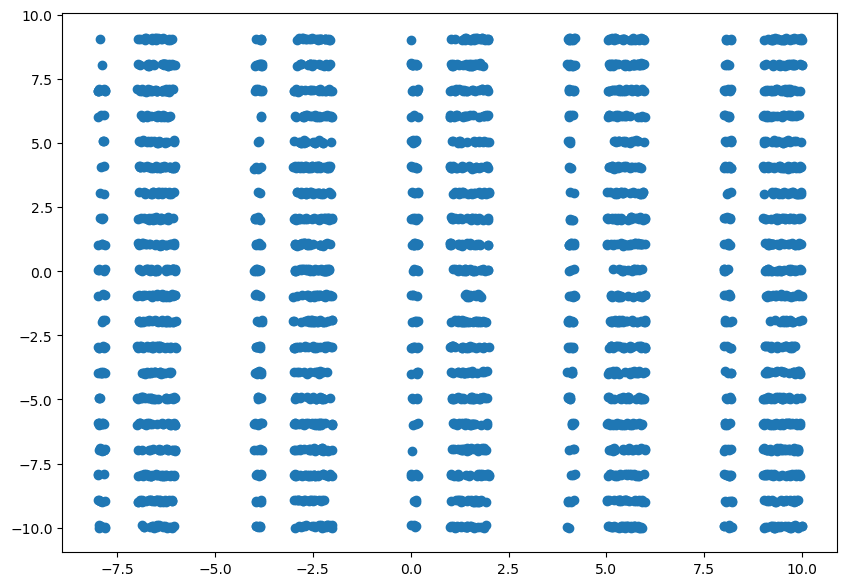

In [21]:
graph(c1_maybe, 10, 10, x_random = True, n_samples= 100000, y_random = True)

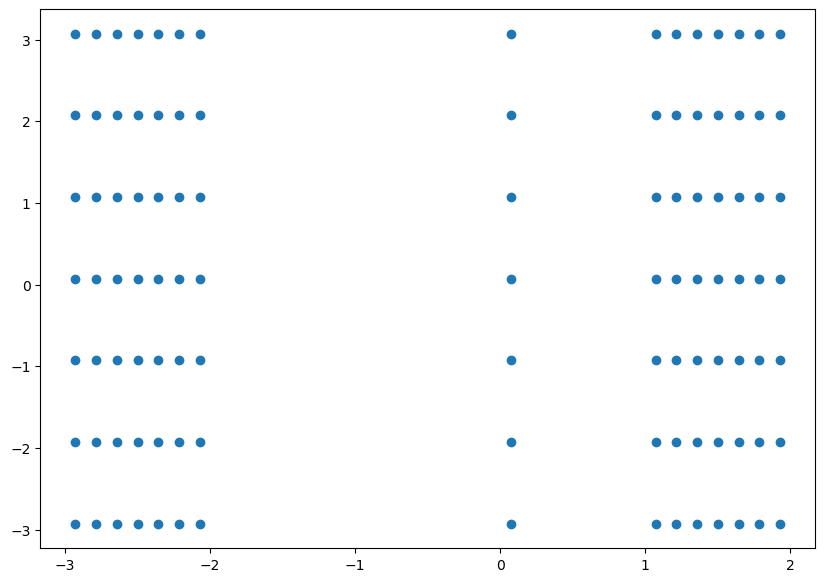

In [27]:
view_window(c1_maybe, 50, 7)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


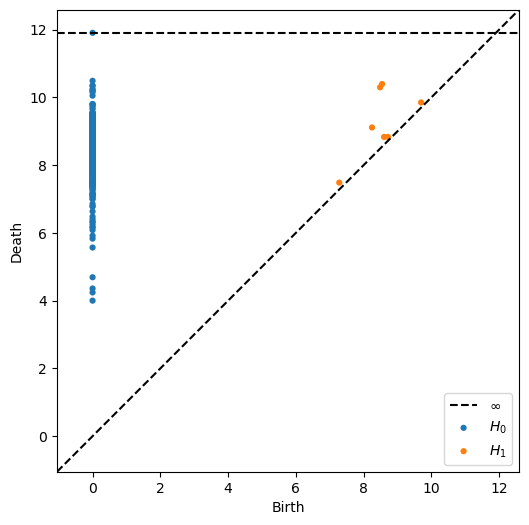

In [28]:
output = pipeline(image_function = c1_maybe, num_pixels = 50, window_size = 7, n_isos= 1000, x_translate = 10, y_translate = 10, maxdim=1, coeff=2)
plot_dgms(output)

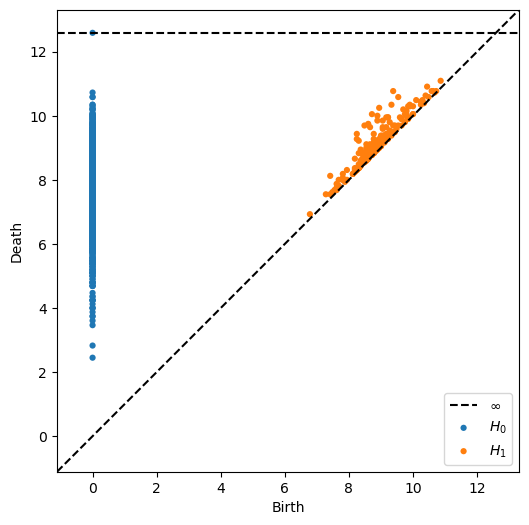

In [29]:
output = pipeline(image_function = c1_maybe, num_pixels = 50, window_size = 7, n_isos= 5000, x_translate = 10, y_translate = 10, maxdim=1, coeff=2)
plot_dgms(output)

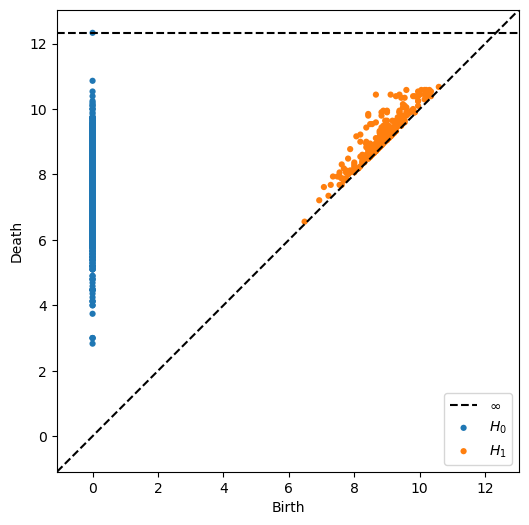

In [30]:
output = pipeline(image_function = c1_maybe, num_pixels = 50, window_size = 7, n_isos= 5000, x_translate = 10, y_translate = 10, maxdim=1, coeff=2)
plot_dgms(output)

## Working with arrow image

In [154]:
import PIL
from PIL import Image, ImageFilter 
from numpy import asarray

In [175]:
image = Image.open("/Users/oliviamcgough/Documents/Persistent Symmetry /persistent-symmetry/studentDemos/images/C1 curly arrow.png")

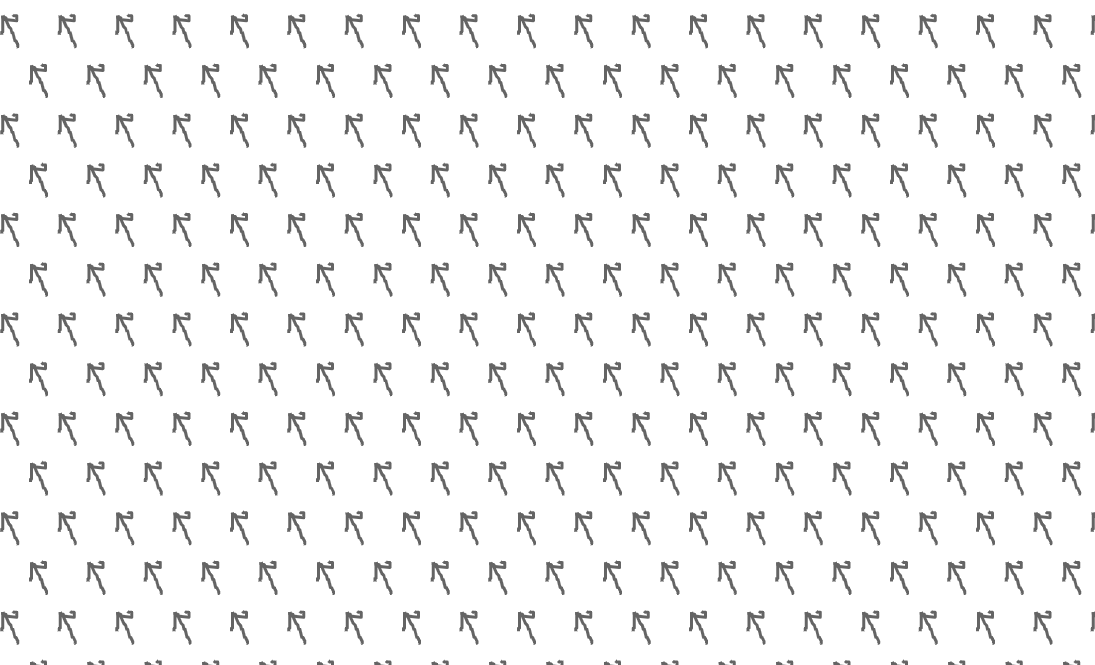

In [176]:
image

In [177]:
image.size

(1095, 665)

In [178]:
image_grey = image.convert('L')
image_grey.size

(1095, 665)

In [205]:
M = array(image)

NameError: name 'array' is not defined

In [185]:
M = asarray(image)
M.shape

(665, 1095, 4)

In [194]:
M_grey = asarray(image_grey)
M_grey.shape

(665, 1095)

In [195]:
M_grey_t = asarray(image_grey).transpose()
M_grey_t.shape

(1095, 665)

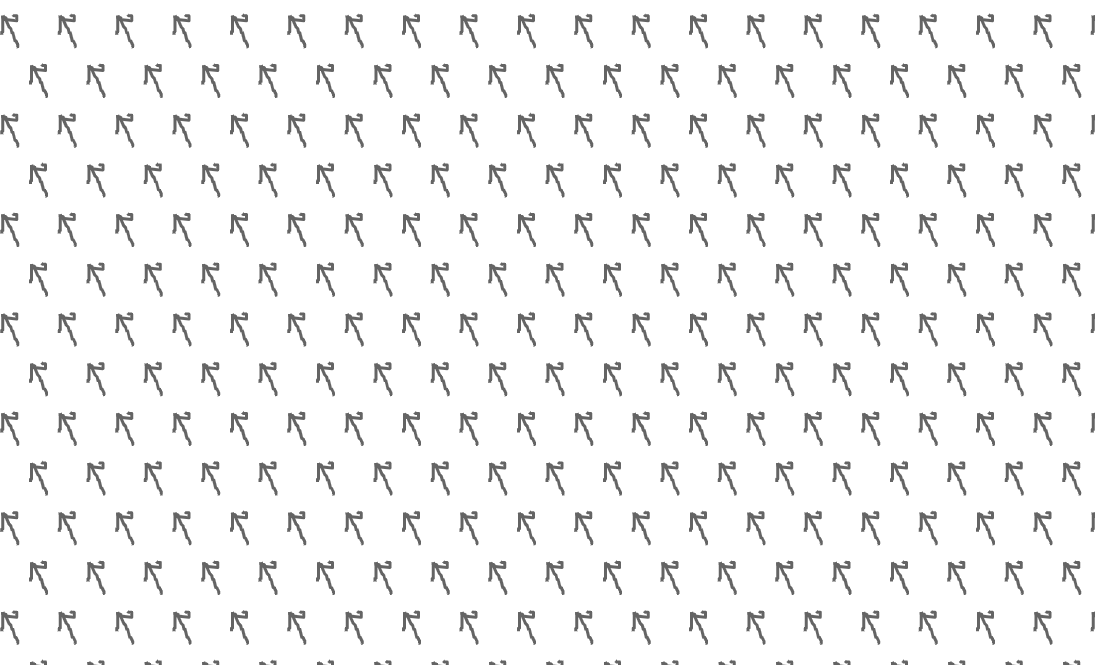

In [196]:
Image.fromarray(M_grey, 'L')

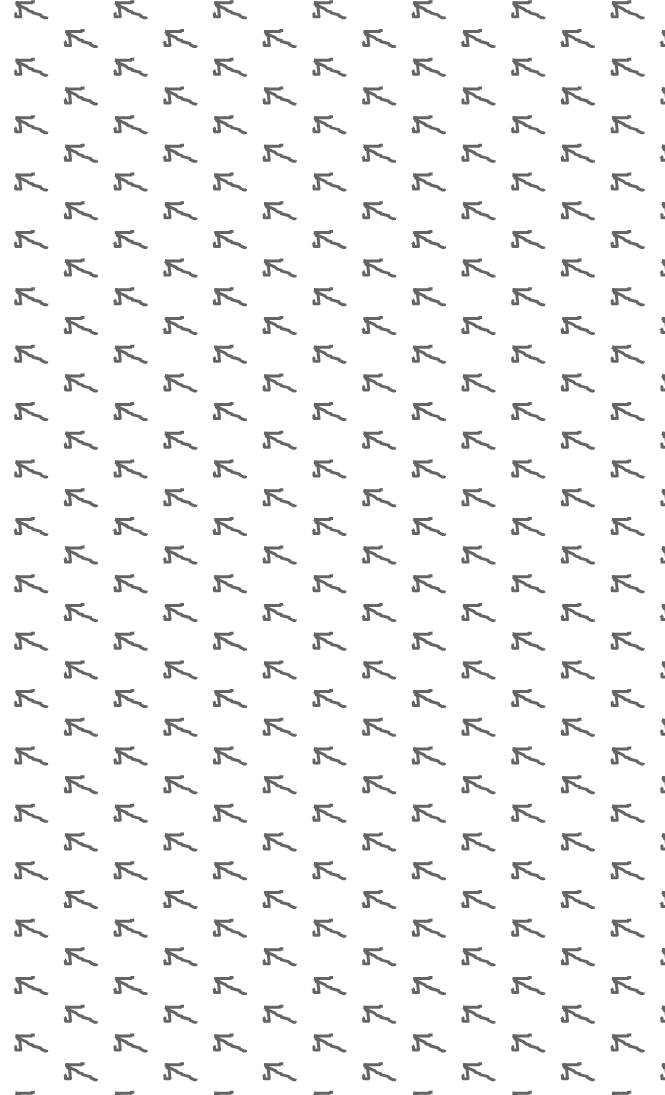

In [197]:
Image.fromarray(M_grey_t, 'L')

In [162]:
def view_window(image, window_size):
    
    pixels = get_pixels(image, window_size)
    
    colors = get_colors(pixels,image)

    x_points = []
    y_points = []
    for pixel in pixels:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

In [169]:
def graph(image):
    
    x_points = []
    y_points = []
    colors=[]
    image_dim = image.shape
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            x_points.append(i)
            y_points.append(j)
            colors.append(image[i][j])
    
    fig = plt.figure(figsize = (7, 10))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

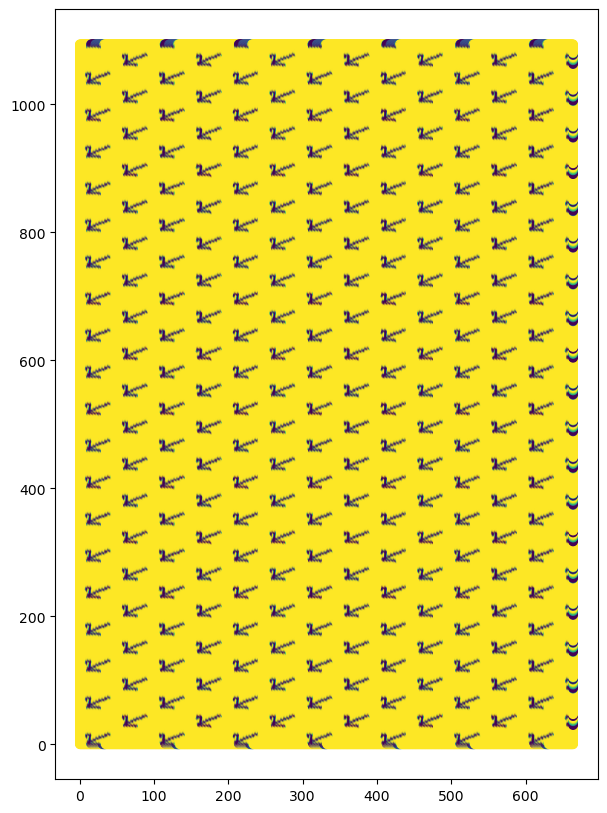

In [198]:
graph(M_grey)

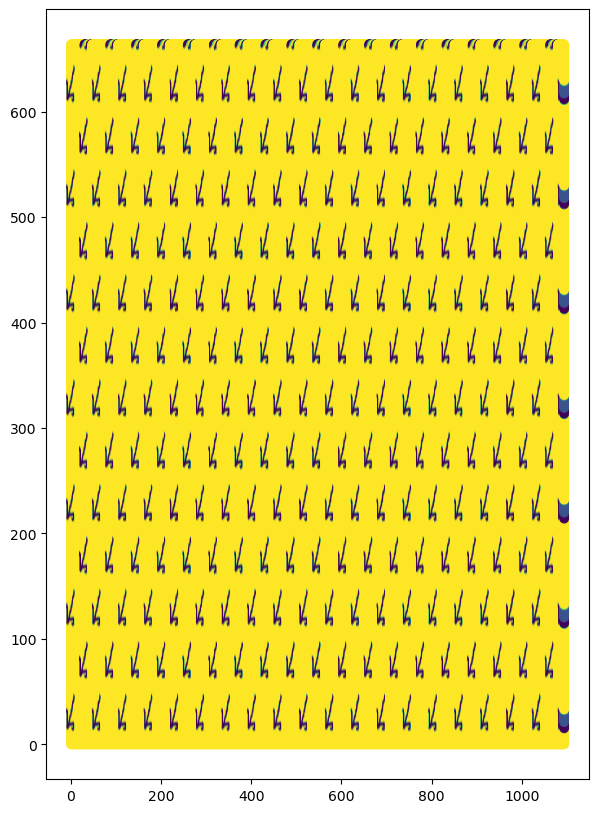

In [199]:
graph(M_grey_t)

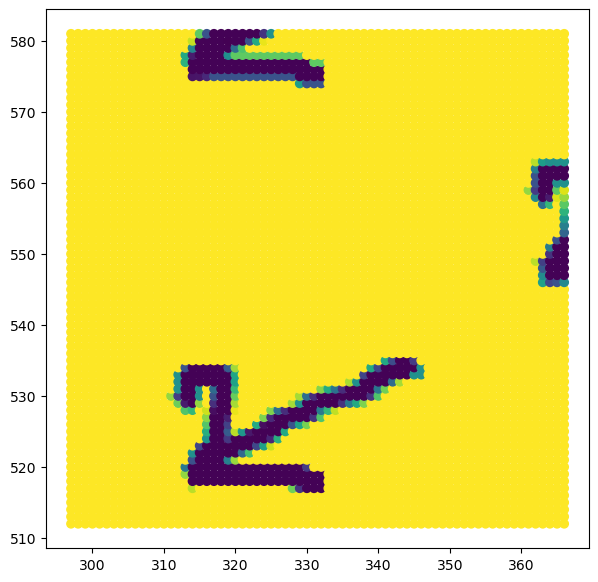

In [163]:
view_window(M_grey, 70)

In [137]:
# REDEFINING TO ACCOUNT FOR IMAGE INSTEAD OF FUNCTION
def get_pixels(image, window_size):
    image_dim = image.shape
    midpoint_x = image_dim[0]//2
    midpoint_y = image_dim[1]//2
    x_interval = (int(midpoint_x - window_size//2), int(midpoint_x + window_size/2))
    y_interval = (int(midpoint_y - window_size//2), int(midpoint_y + window_size/2))
    pixels = []
    for i in range(x_interval[0], x_interval[1]):
        for j in range(y_interval[0],y_interval[1]):
            pixels.append((i,j))
    return pixels

def get_colors(pixels, image):
    colors = []
    for pixel in pixels:
        colors.append(int(image[pixel[0]][pixel[1]]))
    return colors   

def new_colors(pixels, iso_inv, image_data):
    pixels_inv = []
    for pixel in pixels: 
        x_inv,y_inv = iso_inv(pixel[0], pixel[1])
        pixels_inv.append((round(x_inv), round(y_inv)))
    new_colors = get_colors(pixels_inv, image_data)
    return new_colors

def translation(a,b): # this isnt different 
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta, image): # must account for rotation about new "origin" (center of picture)
    def r_theta(x,y):
        image_dim = image.shape
        midpoint_x = image_dim[0]//2
        midpoint_y = image_dim[1]//2
        x_new = x - midpoint_x
        y_new = y - midpoint_y
        x_rotated = x_new * cos(theta) - y_new * sin(theta)
        y_rotated = x_new * sin(theta) + y_new * cos(theta)
        return x_rotated + midpoint_x, y_rotated + midpoint_y
    return r_theta

def isom(a,b,theta,image):
    def iso(x,y):
        r = rotation(theta, image)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate, image):# have to add image in parameters for rotation
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) 
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) 
    theta = list(2 * pi * np.random.random(n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i], image))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i], image))
    return isos_inv


def matrix_of_images(pixels, isos_inv, image):#this isnt different 
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image)])
    M = np.concatenate(vectors, axis=0 )
    return M

In [138]:
def updated_pipeline(image, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(image, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate, image)
    M = matrix_of_images(pixels, isos_inv, image)
    output = p_hom(M, maxdim, coeff)
    return output

In [142]:
def view_isom(image, isom, window_size):
    
    pixels = get_pixels(image, window_size)
    
    colors = new_colors(pixels, isom, image)

    x_points = []
    y_points = []
    for pixel in pixels:
        x_points.append(pixel[0])
        y_points.append(pixel[1])
    
    fig = plt.figure(figsize = (7, 7))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

In [143]:
pixels = get_pixels(image = M_grey, window_size = 50)
pixels

[(307, 522),
 (307, 523),
 (307, 524),
 (307, 525),
 (307, 526),
 (307, 527),
 (307, 528),
 (307, 529),
 (307, 530),
 (307, 531),
 (307, 532),
 (307, 533),
 (307, 534),
 (307, 535),
 (307, 536),
 (307, 537),
 (307, 538),
 (307, 539),
 (307, 540),
 (307, 541),
 (307, 542),
 (307, 543),
 (307, 544),
 (307, 545),
 (307, 546),
 (307, 547),
 (307, 548),
 (307, 549),
 (307, 550),
 (307, 551),
 (307, 552),
 (307, 553),
 (307, 554),
 (307, 555),
 (307, 556),
 (307, 557),
 (307, 558),
 (307, 559),
 (307, 560),
 (307, 561),
 (307, 562),
 (307, 563),
 (307, 564),
 (307, 565),
 (307, 566),
 (307, 567),
 (307, 568),
 (307, 569),
 (307, 570),
 (307, 571),
 (308, 522),
 (308, 523),
 (308, 524),
 (308, 525),
 (308, 526),
 (308, 527),
 (308, 528),
 (308, 529),
 (308, 530),
 (308, 531),
 (308, 532),
 (308, 533),
 (308, 534),
 (308, 535),
 (308, 536),
 (308, 537),
 (308, 538),
 (308, 539),
 (308, 540),
 (308, 541),
 (308, 542),
 (308, 543),
 (308, 544),
 (308, 545),
 (308, 546),
 (308, 547),
 (308, 548),

In [146]:
isos = generate_isom(n_isos = 1000, x_translate = 50, y_translate = 50, image = M_grey)

In [147]:
f = isos[0]
f

<function __main__.isom.<locals>.iso(x, y)>

In [148]:
f(pixels[0][0], pixels[0][1])

(331.3641999300307, 560.3349114673867)

In [149]:
new_colors(pixels, f, M_grey)

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 139,
 100,
 100,
 216,
 211,
 154,
 100,
 100,
 142,
 100,
 100,
 100,
 115,
 115,
 255,
 255,
 139,
 100,
 100,
 216,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 139,
 100,
 100,
 100,
 216,
 255,
 100,
 100,
 173,
 255,
 136,
 121,
 100,
 100,
 132,
 149,
 139,
 100,
 100,
 100,
 216,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 139,
 100,
 100,
 216,
 255,
 194,
 138,
 100,
 118,
 246,
 255,
 255,
 100,
 100,
 100,
 100,
 139,
 100,
 100,
 216,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 139,
 100

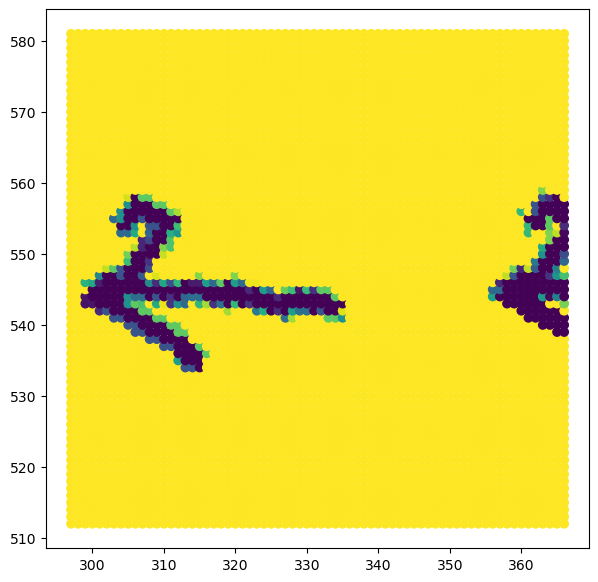

In [151]:
view_isom(M_grey,f,70)

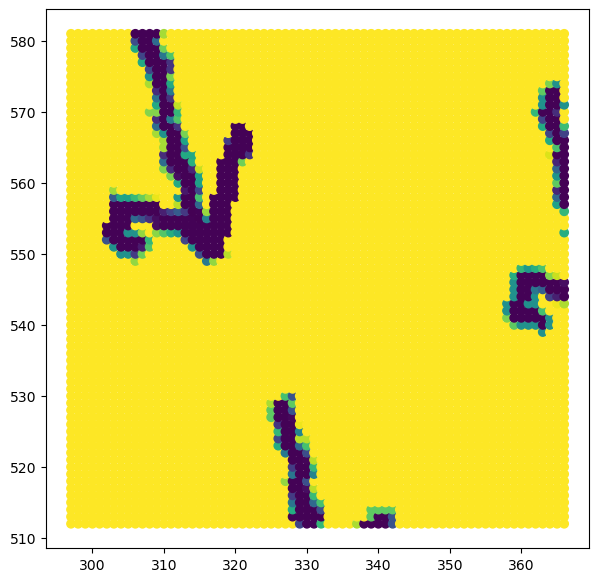

In [202]:
pixels = get_pixels(image = M_grey, window_size = 50)
g = isos[1]
g(pixels[0][0], pixels[0][1])
view_isom(M_grey,g,70)

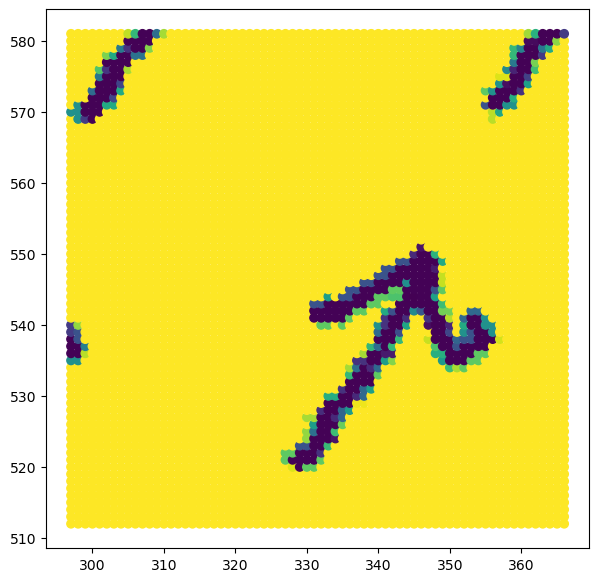

In [203]:
pixels = get_pixels(image = M_grey, window_size = 50)
g = isos[2]
g(pixels[0][0], pixels[0][1])
view_isom(M_grey,g,70)

/Users/oliviamcgough/opt/anaconda3/lib/python3.9/site-packages/ripser/ripser.py:253: UserWarning: The input point cloud has more columns than rows; did you mean to transpose?
  warnings.warn(


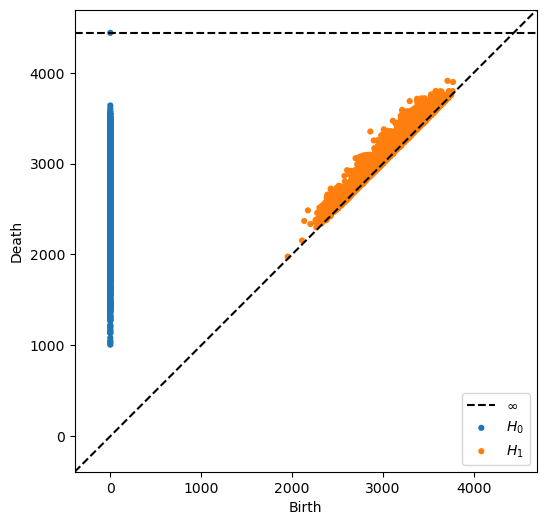

In [141]:
output = updated_pipeline(image = M_grey, window_size = 70, n_isos=3000, x_translate=50, y_translate=50, maxdim=1, coeff=2)
plot_dgms(output)

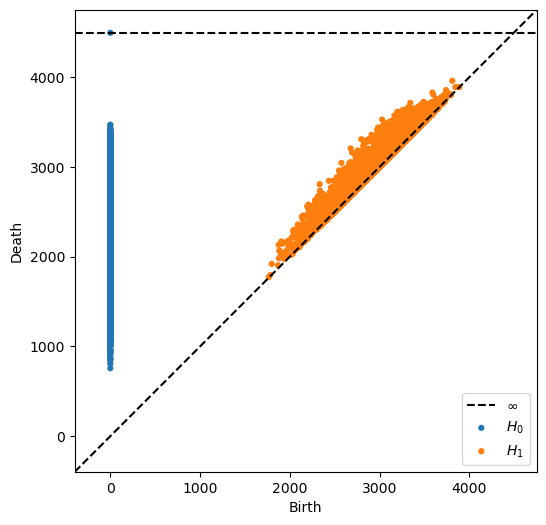

In [164]:
output = updated_pipeline(image = M_grey, window_size = 70, n_isos=7000, x_translate=50, y_translate=50, maxdim=1, coeff=2)
plot_dgms(output)

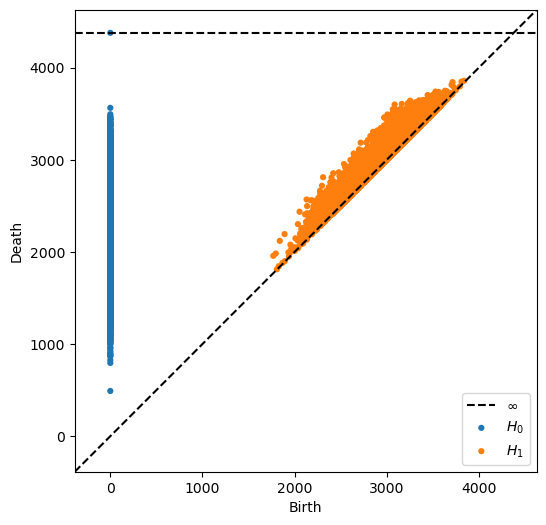

In [204]:
output = updated_pipeline(image = M_grey, window_size = 70, n_isos=7000, x_translate=200, y_translate=200, maxdim=1, coeff=2)
plot_dgms(output)